<a href="https://colab.research.google.com/github/vishnuvmullapudi/LinkedIn-Job-Salary-Prediction/blob/main/Group_9_first_variable_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First variable Selection

## Variable selection involves choosing a subset of relevant features or variables from a larger set. The primary goal of variable selection is to improve the performance of a machine learning model by focusing on the most informative and significant features. This improves model performance, noise reduction, prevents overfitting, reduce the complexity and increases comuputational efficiency.

## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the cleaned_data

In [ ]:
df = pd.read_csv("/content/cleaned_data.csv")

In [ ]:
df.head(5)

,job_title,salary,pay_period,work_type,location,experience_level,sponsored,currency,skills,company_name,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
0,Sales Manager,88336.222112,2,1,"Santa Clarita, CA",5,0,USD,"SALE, BD",CargoLogin.,1.0,1,0,0
1,Model Risk Auditor,88336.222112,3,0,"New York, NY",5,0,USD,"ACCT, FIN",Employvision Inc.,1.0,1,0,0
2,NY Studio Assistant,88336.222112,2,1,"New York, NY",5,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0,1,0,0
3,Office Associate,42000.000000,2,1,"Albany, GA",5,1,USD,ADM,Sunnyland Farms,2.0,1,0,0
4,Education Manager,88336.222112,2,1,United States,5,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0,0,1,0


In [ ]:
df.describe()

,salary,pay_period,work_type,experience_level,sponsored,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
count,1.434300e+04,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000
mean,8.858367e+04,2.015687,1.125009,3.615631,0.293802,4.913547,0.309768,0.644286,0.045946
std,5.323768e+04,0.463526,0.891822,1.784866,0.455518,2.033035,0.462414,0.478746,0.209375
min,1.150000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.833622e+04,2.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,8.833622e+04,2.000000,1.000000,5.000000,0.000000,5.000000,0.000000,1.000000,0.000000
75%,8.833622e+04,2.000000,1.000000,5.000000,1.000000,7.000000,1.000000,1.000000,0.000000
max,1.100000e+06,3.000000,6.000000,5.000000,1.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:
X = df.drop(['salary','job_title','location','skills','currency','company_name'], axis=1)
y = df['salary']

## Dimensions of X and y

In [ ]:
X.shape

(14343, 8)

In [ ]:
y.shape

(14343,)

## With the help of sklearn train_test_split we splitted the dataset into two parst train set and test set. So, total 14343 rows are splitted into three sets where 11474 in train set, 1434 rows into validation set and remaining 1435 in test set.

In [ ]:
#Splitting the data into two parts train and test
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Dimensions of X_train, X_val, and X_test after splitting the data

In [ ]:
X_train.shape

(11474, 8)

In [ ]:
X_val.shape

(1434, 8)

In [ ]:
X_test.shape

(1435, 8)

## Scaling the data set using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)

## Lasso regression(L1 regularization), is a linear regression technique that adds a penalty term based on the absolute values of the coefficients to the standard linear regression objective. This penalty encourages sparsity in the coefficient values, effectively driving some of them to exactly zero. This helps for feature selection, handeling irregular features, gives stabilty to our model, and prevents overfitting.

In [ ]:
#fitting the model
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [ ]:
# Making predictions on the testing set
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
# Making predictions on the validation set
y_val_pred = lasso_model.predict(X_val_scaled)

In [ ]:
# Making predictions on the test set
y_test_pred = lasso_model.predict(X_test_scaled)

In [ ]:
#Mean Squared Error on trained data
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)

In [ ]:
#R^2 score on train set
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)

In [ ]:
#Mean Squared Error on Validation set
from sklearn.metrics import mean_squared_error
mse_val = mean_squared_error(y_val, y_val_pred)

In [ ]:
#R^2 score on validation set
from sklearn.metrics import r2_score
r2_val = r2_score(y_val, y_val_pred)

In [ ]:
#Mean Squared Error on test set
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_test_pred)

In [ ]:
#R^2 score on test set
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f'Training Set Mean Squared Error: {mse_train}, R-squared: {r2_train}')
print(f'Validation Set Mean Squared Error: {mse_val}, R-squared: {r2_val}')
print(f'Test Set Mean Squared Error: {mse_test}, R-squared: {r2_test}')

Training Set Mean Squared Error: 0.9546275331424531, R-squared: 0.04537246685754692
Validation Set Mean Squared Error: 0.7144791383748358, R-squared: 0.054131157106927175
Test Set Mean Squared Error: 0.7995839123848419, R-squared: 0.060328911038727395


In [ ]:
coefficients = lasso_model.coef_

In [ ]:
non_zero_coefficients = coefficients[coefficients != 0]
non_zero_features = X.columns[coefficients != 0]

In [ ]:
print('Non-zero Coefficients:')
print(pd.DataFrame({'Feature': non_zero_features, 'Coefficient': non_zero_coefficients}))

Non-zero Coefficients:
                       Feature  Coefficient
0                   pay_period    -0.332817
1                    work_type    -0.293169
2             experience_level     0.085996
3                    sponsored    -0.000065
4                 company_size     0.006181
5  category_ComplexOnsiteApply    -0.034597


## From the above coefficients we can see that the variable experience_level has highest positive correlation value. But when you consider the magnitude values of the coefficients the first two will have the highest value of coefficient

# Hyperparameter Tuning

In [ ]:
param_grid = {'alpha': np.logspace(-3, 3, 100)}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

## Same GridSearchCV is used for hyperparameter tuning

In [ ]:
# Fitting the model to the validatiom data
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.01),
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [ ]:
optimal_alpha = gs.best_params_['alpha']
print(f'Optimal Alpha: {optimal_alpha}')

Optimal Alpha: 0.001


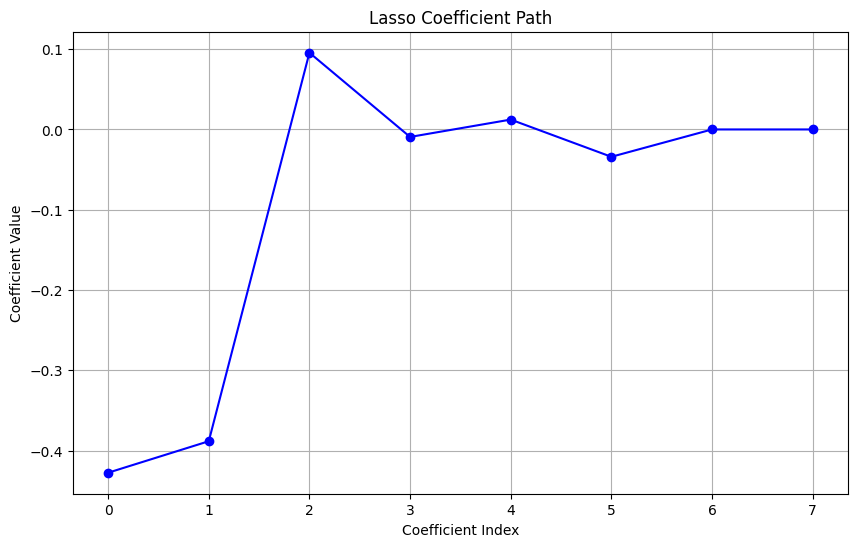

In [ ]:
coefs = gs.best_estimator_.coef_

plt.figure(figsize=(10, 6))
plt.plot(coefs, marker='o', linestyle='-', color='b')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficient Path')
plt.grid(True)
plt.show()

## The above line plot describes the value of coefficients of all the features in the dataset

In [ ]:
y_pred = gs.predict(X_test_scaled)

In [ ]:
final_coefficients = gs.best_estimator_.coef_

In [ ]:
non_zero_final_coefficients = final_coefficients[final_coefficients != 0]
non_zero_final_features = X.columns[final_coefficients != 0]

In [ ]:
print('Non-zero Coefficients of the Final Model:')
print(pd.DataFrame({'Feature': non_zero_final_features, 'Coefficient': non_zero_final_coefficients}))

Non-zero Coefficients of the Final Model:
                       Feature  Coefficient
0                   pay_period    -0.427440
1                    work_type    -0.388220
2             experience_level     0.095542
3                    sponsored    -0.009325
4                 company_size     0.012293
5  category_ComplexOnsiteApply    -0.034053


## The final coefficients of the model after selecting best parameters. Same thing has happened here but the values are slightly changed.

## Now, lets plot a barplot of Actual value values vs Predicted Values on test set

R-squared: 0.062191627491923196


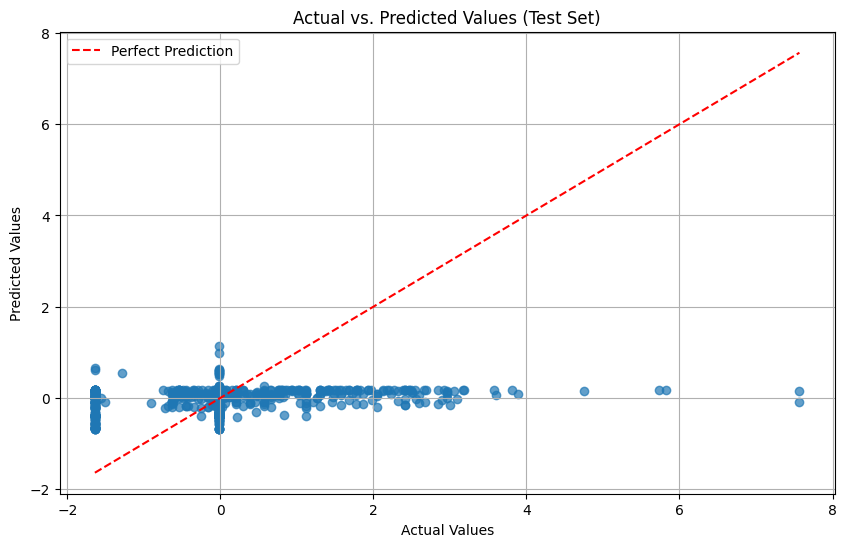

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared on the test set
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

# Visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Perfect Prediction')
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs. Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
results = gs.cv_results_
mse_values = results['mean_test_score']

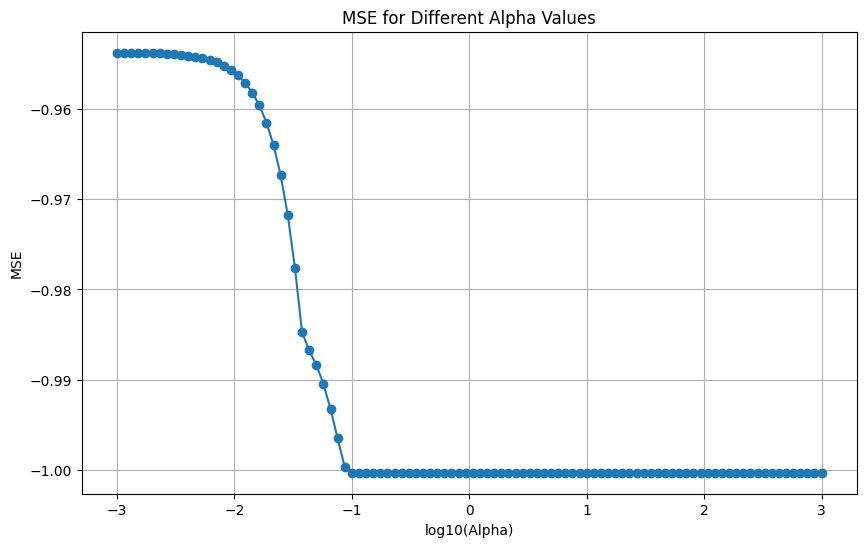

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(param_grid['alpha']), mse_values, marker='o')
plt.xlabel('log10(Alpha)')
plt.ylabel('MSE')
plt.title('MSE for Different Alpha Values')
plt.grid(True)
plt.show()

## The above plot gives the details of MSE values for different alpha values. from the plot you can see the drop of MSE value in the begining and then it completely dropped to -1.